In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import scipy.io.wavfile as wav
import IPython.display as ipd

## Let's start playing with sounds

### Create a sinusoidal sound

In [3]:
# Define the duration of the sound we want to create:
# duration in seconds
duration = 5

In [4]:
# Define the rate of the sound, which is the number of sample points per second
DEFAULT_RATE = 44100

In [5]:
# The total number of sample points that define your sound is:
nsamples = int(DEFAULT_RATE*duration)

In [6]:
# Then create a numpy array that define the range of the sound, i.e., 
# nsamples points equaly spaced in the range (0,duration) [s]
t = np.linspace(0,duration,nsamples)

Create a sound array corresponding to the function

$ f(t) = \sin(220 (2 \pi t)) + \sin(224 (2 \pi t))$

In [7]:
#clear
f = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)

Use `plt.plot(t,f)` to plot your function:

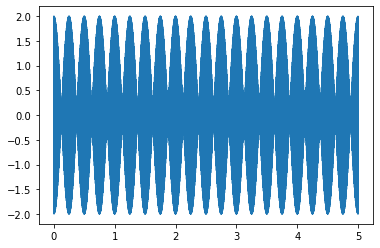

In [8]:
plt.plot(t,f)

Check the sound you just created!

In [9]:
ipd.Audio(f,rate=DEFAULT_RATE)

You can also try different functions!

### Create a music note

Let's make the sound of the A5 note. (https://en.wikipedia.org/wiki/Piano_key_frequencies)

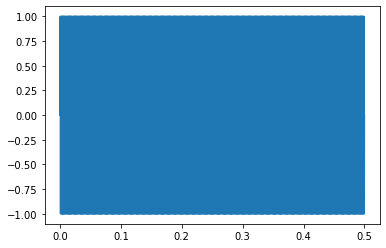

In [10]:
# We want to have the note played for 0.5 seconds
duration = 0.5
# Define the rate
rate = DEFAULT_RATE
# The number of samples needed is
nsamples = int(rate*duration)
# # The frequency of A5 is 880. 
freq = 880
t = np.linspace(0, duration, nsamples)
f = np.sin(freq*2*np.pi*t)
plt.plot(t,f)
ipd.Audio(f,rate=rate)

### Write a function `make_note` 

Just add the steps described above to define the function `make_note`. The function should have the following signature:

```python
def make_note(freq, duration=0.3, rate=44100):
    '''
    receives as arguments:
        - frequency of the note (freq)
        - duration of the sound (set as default equal to 0.3)
        - rate (samples per second)
    and returns:
        - np.array "f" with the beep
    '''
```

In [11]:
#grade_clear
def make_note(freq, duration=0.3, rate=44100):
    '''
    receives as arguments:
        - frequency of the note (freq)
        - duration of the sound (set as default equal to 0.3)
        - rate (samples per second)
    and returns:
        - np.array data with the beep
    '''
    nsamples = int(rate * duration)
    # make a time sequence
    t = np.linspace(0, duration, nsamples)    
    # make a (sine) sound wave with frequency = freq
    data = np.sin(freq*2*np.pi*t)
    
    return data

Use `note = make_note(...)` function to create the following sounds:

note | duration | freq
--- | --- | --- 
A<sub>4</sub> | 3 | 440
C<sub>4</sub> | 4 | 261.6256

Then you can plot the sound array using:

`plt.plot(note)`

And listen to the sound using:

`ipd.Audio(note,rate=DEFAULT_RATE)`

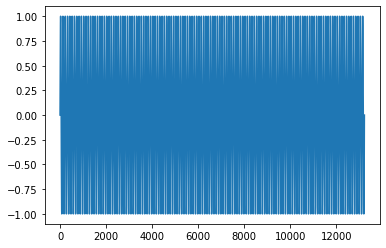

In [12]:
#clear
note_A5 = make_note(440)
plt.plot(note_A5)
ipd.Audio(note_A5,rate=DEFAULT_RATE)

### Create a new function `make_note_decay`

This function modifies the `make_note` function, by adding a parabolical decay to zero over the time duration of the sound. For that, we need a ramp function, which starts with value equal to 1 and finishes with value of zero, and includes nsamples data points:

In [13]:
ramp = np.linspace(0, 1, nsamples)

Check the function that gives the linear decay:

`plt.plot(1-ramp)`

And also the function that gives the parabolical decay

`plt.plot((1-ramp)**2)`

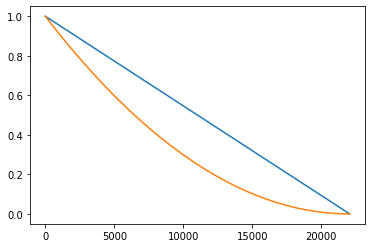

In [14]:
# Here is the linear decay
plt.plot(1-ramp)
# Here is the parabolical decay
plt.plot((1-ramp)**2)

Create the function `make_note_decay` that applies the parabolical decay to the note. The function has the following signature:

```python
def make_note_decay(freq, duration=0.3, rate=44100):
    '''
    receives as arguments:
        - frequency of the note (freq)
        - duration of the sound (set as default equal to 0.3)
        - rate (samples per second)
    and returns:
        - np.array data with the beep
    '''
```

In [15]:
#grade_clear
def make_note_decay(freq, duration=0.3, rate=44100):
    '''
    receives as arguments:
        - frequency of the note (freq)
        - duration of the sound (set as default equal to 0.3)
        - rate (samples per second)
    and returns:
        - np.array data with the beep
    '''
    nsamples = int(rate * duration)
    # make a time sequence
    t = np.linspace(0, duration, nsamples)    
    # make a (sine) sound wave with frequency = freq
    data = np.sin(freq*2*np.pi*t)
    ramp = np.linspace(0, 1, nsamples)
    
    return data*(1-ramp)**2

Use your function to create the note A<sub>8</sub> (freq=7040) with duration of 2 seconds. Then plot the sound array using `plt.plot(note)` and listen to the sound using `ipd.Audio(note,rate=DEFAULT_RATE)`

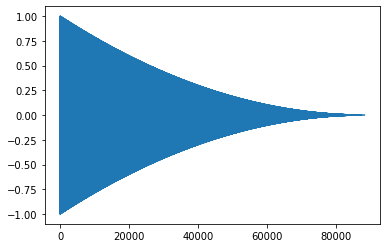

In [16]:
data_A6 = make_note_decay(7040,duration=2)
plt.plot(data_A6)
ipd.Audio(data_A6,rate=DEFAULT_RATE)

### We can make "real" music :-)

![title](ballgame.png)

Here is how we could write the song above:

note | duration | freq
--- | --- | --- 
C | 2 | 261.626
C | 1 | 523.251
A | 1 | 440.0
G | 1 | 391.995
E | 1 | 329.628	
G | 3 | 391.995
D | 3 | 293.665

We enter the above information as a list of lists. We only need the duration of each note, and the corresponding frequency:

In [17]:
notes = [
    [2,261.626],
 [1,523.251],
 [1,440.000],
 [1,391.995],
 [1,329.628],
 [3,391.995],
 [3,293.665]]

If we loop at the list above, we can use `notes[i]` to create the sound corresponding to each note using the function `make_note_decay`. We can then use the function `numpy.hstack` to combine notes to make music:

```
# Initialize an empty array for the music
music = np.array([])

# loop over `notes` to create sound, then use np.stack to add the sound to music:
music = np.hstack( (music, sound) )

# Check the music you created!
ipd.Audio(music,rate=DEFAULT_RATE)
```

In [18]:
#clear
music = np.array([])

for note in notes:
    sound = make_note_decay( note[1], duration=0.5*note[0] )
    music = np.hstack( (music, sound) )

ipd.Audio(music,rate=DEFAULT_RATE)